In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('Datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info


<bound method DataFrame.info of           Month  Year    Region  Dengue_Cases  Dengue_Deaths
0       January  2016  Region I           705              1
1      February  2016  Region I           374              0
2         March  2016  Region I           276              0
3         April  2016  Region I           240              2
4           May  2016  Region I           243              1
...         ...   ...       ...           ...            ...
1015     August  2020     BARMM            91              0
1016  September  2020     BARMM            16              8
1017    October  2020     BARMM            13              9
1018   November  2020     BARMM            15              1
1019   December  2020     BARMM            23              0

[1020 rows x 5 columns]>

In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

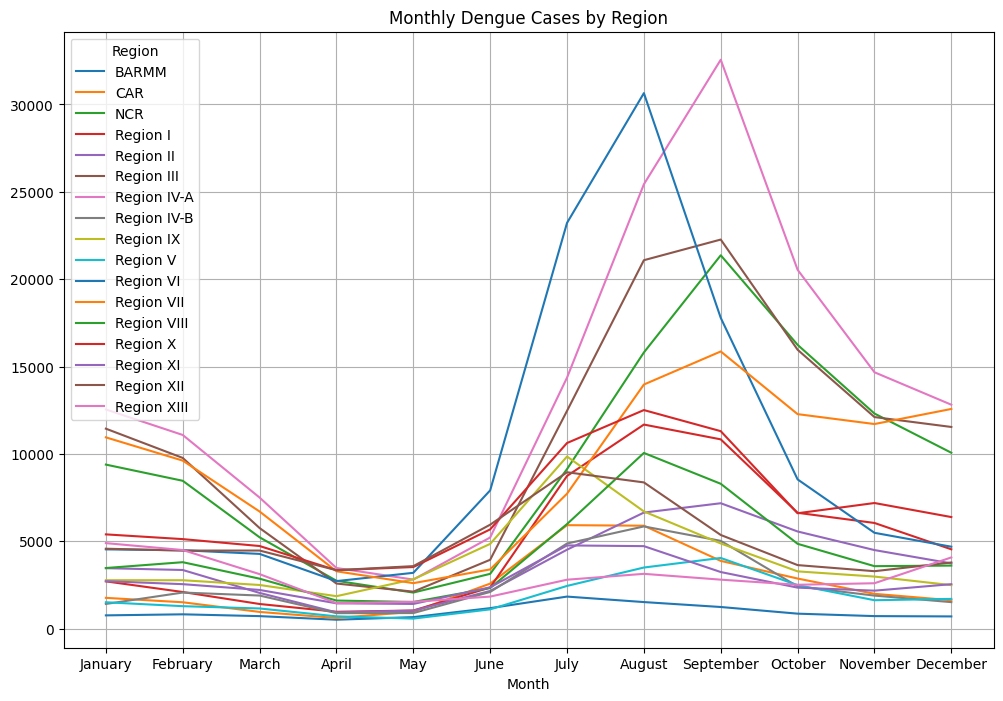

In [8]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby(['Month', 'Region'])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line',title='Monthly Dengue Cases by Region')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

<h2>Insight #1

<h2> Dengue cases start to rise dramatically in June, peak in August and September, and then start to fall again in October. This trend coincides with the rainy season, which runs from June to October. During this time, mosquitoes thrive on stagnant water.

<Figure size 1300x800 with 0 Axes>

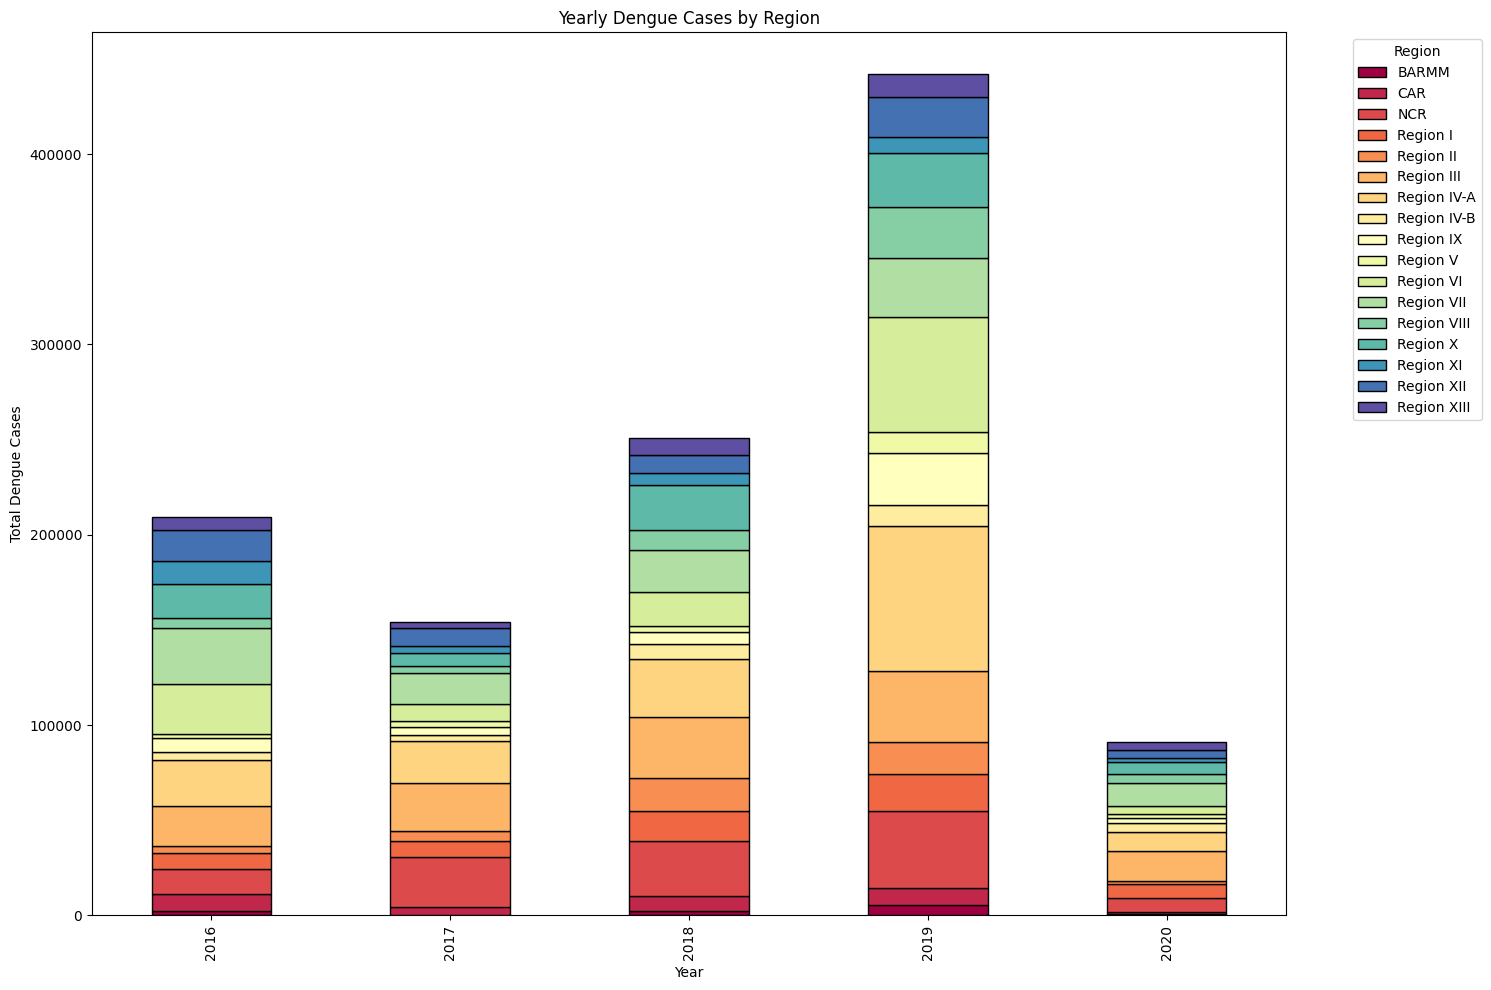

In [11]:
yearly_cases = dengue.groupby(['Year', 'Region'])["Dengue_Cases"].sum().unstack()

# Plot the yearly trend
plt.figure(figsize=(13, 8))
yearly_cases.plot(kind='bar', stacked=True, figsize=(15, 10),colormap='Spectral', edgecolor='black')

plt.title('Yearly Dengue Cases by Region')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h2> Insight #2

<h2> In comparison to the previous years, 2019 stands out as an epidemic year due to the sharp surge in the overall number of dengue cases.


<h2> Insight #3

<h2>This is consistent with actual data, which shows that 2019 was one of the worst dengue outbreak years in the Philippines, affecting the majority of regions at once.

<h2> Insight #4

<h2> The sudden drop after 2019 might be attributed to COVID-19 restrictions reducing outdoor exposure and travel.

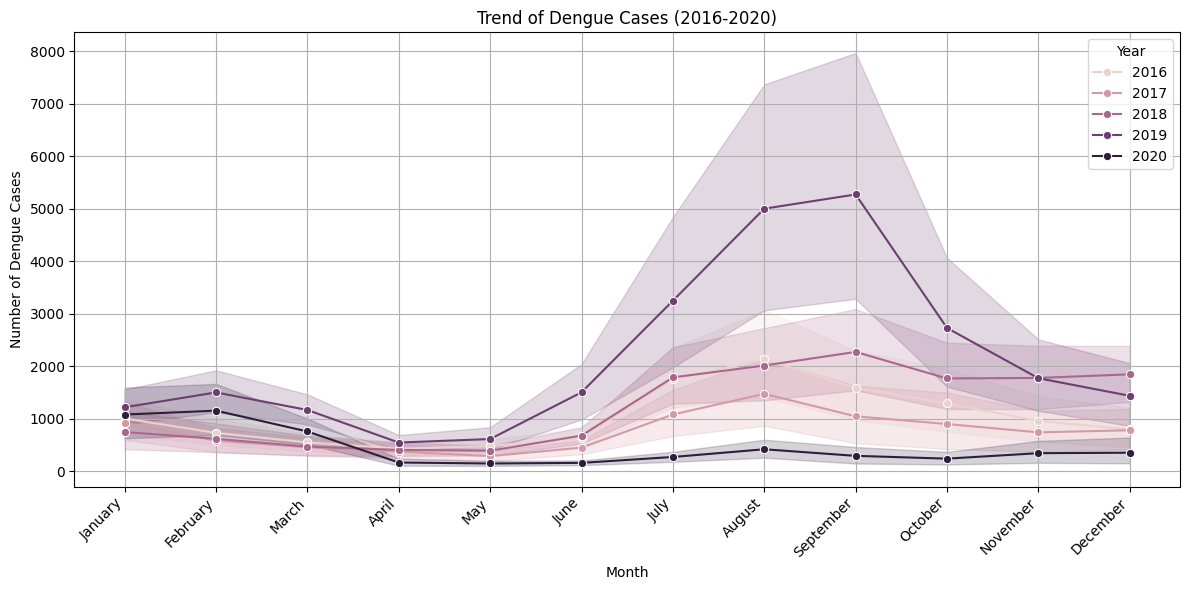

In [13]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o')
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h2> Insight #5

<h2> The Dengvaxia vaccine was released in 2016.
<h2>Regretfully, Sanofi, the company that developed the vaccine, announced over two years after the campaign began that Dengvaxia may result in "more severe disease" in people who had never had dengue. Due to allegations of child fatalities from the vaccine and government corruption, lawsuits were brought against Sanofi and other government officials after more than 800,000 children had been indiscriminately vaccinated by this point. A measles outbreak in 2019 was caused by the ensuing mistrust of the public health system, which caused vaccination rates to plummet. 

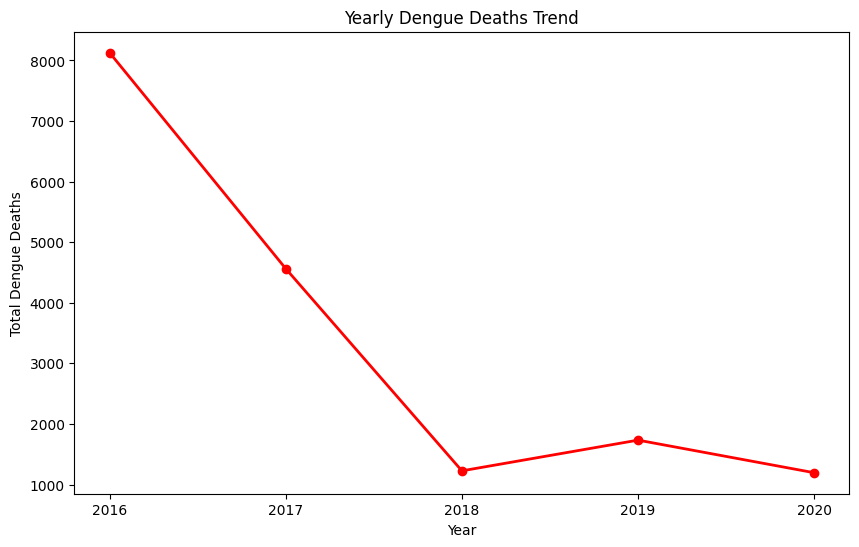

In [16]:
yearly_deaths = dengue.groupby('Year')['Dengue_Deaths'].sum()

plt.figure(figsize=(10,6))
plt.plot(yearly_deaths.index, yearly_deaths.values, marker='o', color='red', linewidth=2)
plt.title('Yearly Dengue Deaths Trend')
plt.xlabel('Year')
plt.xticks(range(2016,2021))
plt.ylabel('Total Dengue Deaths')
plt.show()

<h2>Insight #6

<h2>According to the data, dengue mortality sharply decreased between 2016 and 2018, which is when the Dengvaxia immunization program was introduced. However, health officials suspended the vaccine in 2017–2018 after receiving reports of negative side effects. Despite relatively low fatality rates, the dramatic rise in dengue infections in 2019 was probably caused by a decline in vaccination rates as public confidence in the vaccine declined.

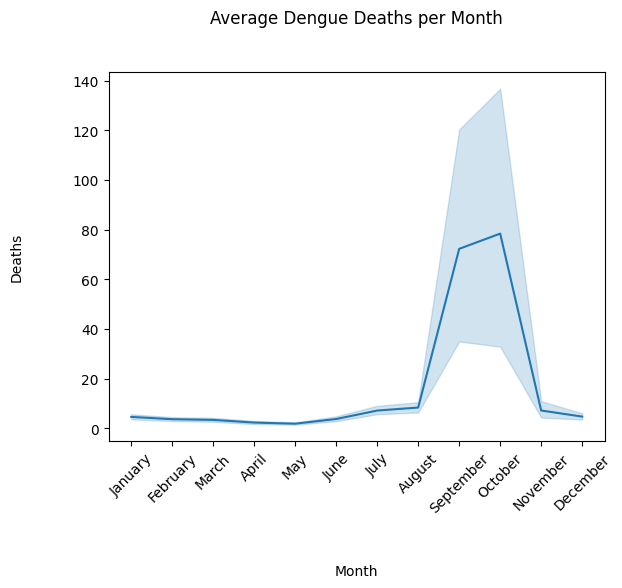

In [17]:
sns.lineplot(data = dengue, x = 'Month', y = 'Dengue_Deaths')
plt.xticks(rotation = 45)
plt.title(label='Average Dengue Deaths per Month', pad=35)
plt.xlabel(xlabel='Month', labelpad=35)
plt.ylabel(ylabel='Deaths', labelpad=35)
plt.show()

<h2> Insight #7

<h2>By analyzing the chart, we found out that:

<h2>*Dengue deaths are high on the month of August to October
<h2>*The temperature can be factor according to the article earlier, and August has the highest number of cases.
<h2>*Dengue deaths during this period can be due to the high number of cases, or other factors like lack of healthcare assistance since there may be Hospital shortages

<Figure size 1500x600 with 0 Axes>

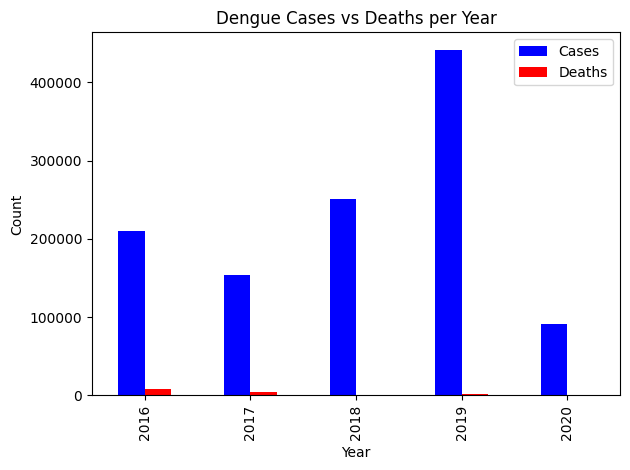

In [18]:
yearly_summary = dengue.groupby('Year')[['Dengue_Cases','Dengue_Deaths']].sum()

plt.figure(figsize=(15,6))
yearly_summary.plot(kind='bar', color=['blue', 'red'])
plt.title('Dengue Cases vs Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Cases', 'Deaths'])
plt.tight_layout()
plt.show()


<h2> Insight #8

<h2>Despite a sharp increase in dengue infections in 2019, relatively few people died from the disease, indicating advancements in hospital preparedness and case management. The DOH stated that even though infection rates increased significantly, more mortality was probably avoided by early treatment treatments.

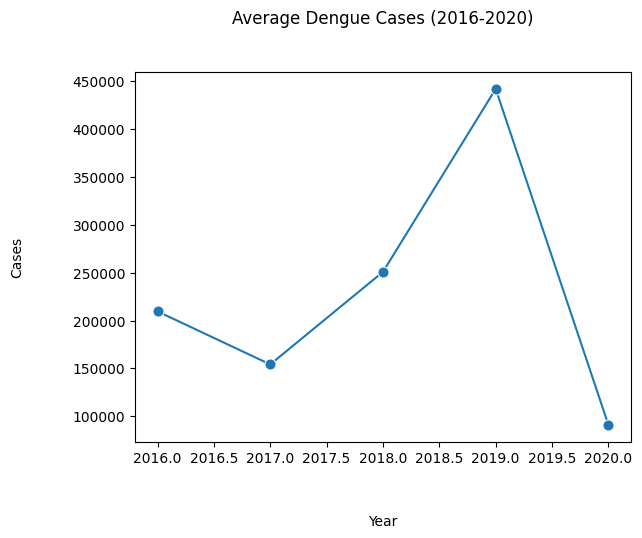

In [19]:
dengue_sum = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()
sns.lineplot(data = dengue_sum, x = 'Year', y = 'Dengue_Cases', marker='o', markersize=8)
plt.title(label='Average Dengue Cases (2016-2020)', pad=35)
plt.xlabel(xlabel='Year', labelpad=35)
plt.ylabel(ylabel='Cases', labelpad=35)
plt.show()

<h2> Insight #9

<h2>*There was a decrease from 2016 to 2017.
<h2>*However, the number of instances then rose from early 2018 to mid-2019.
<h2>*During the 2020 drop, the number of cases reached an all-time low.

In [20]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [21]:
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)


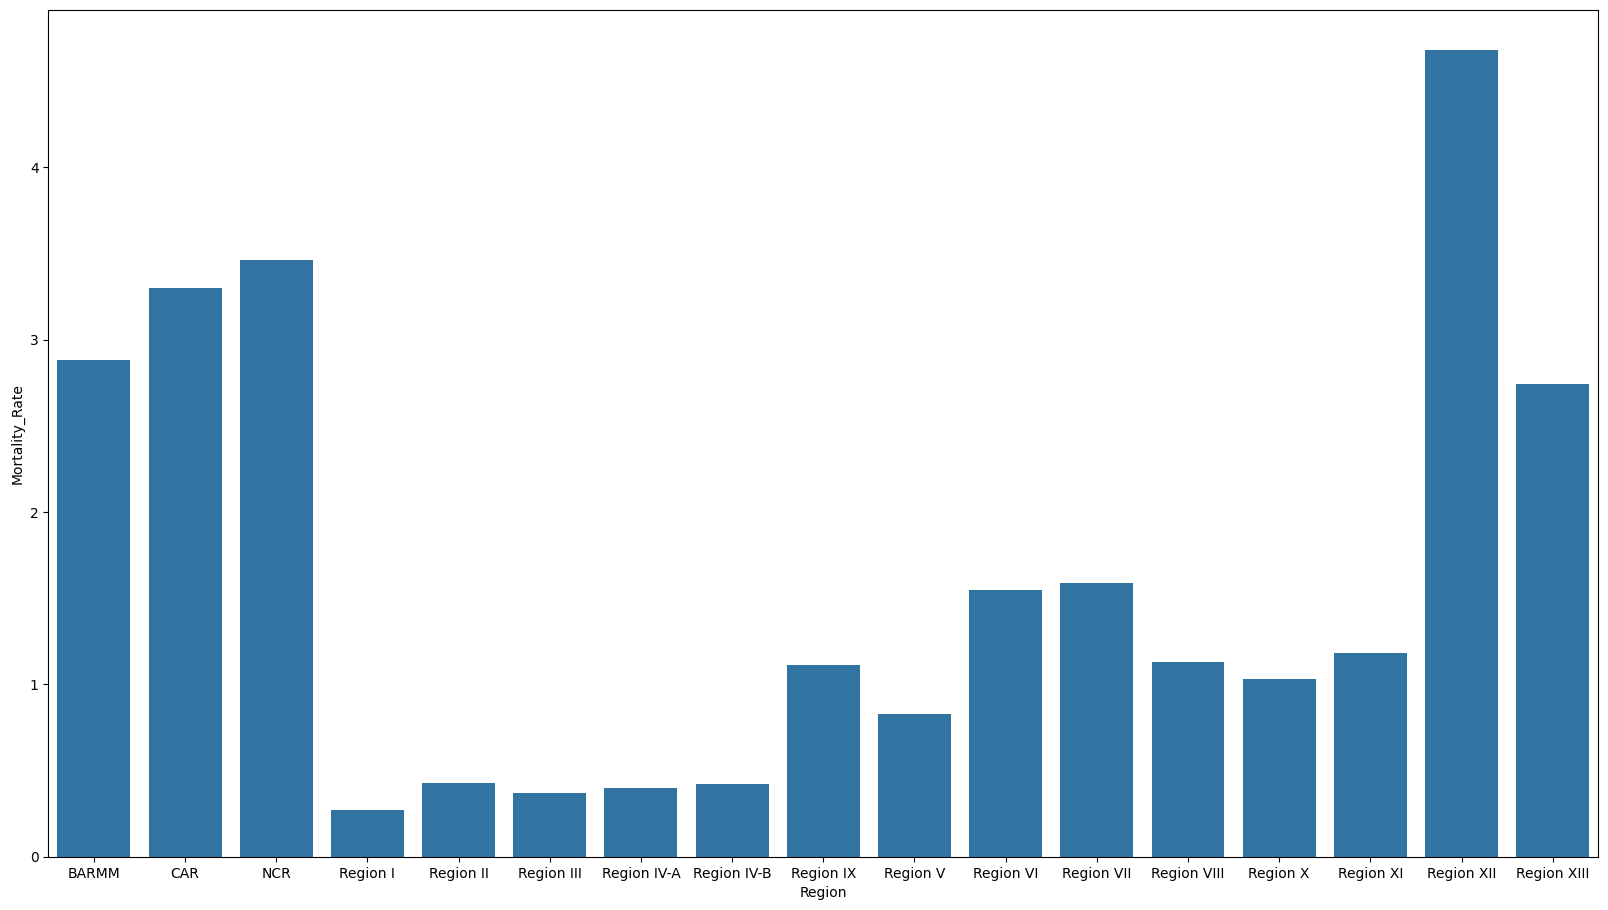

In [22]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h2> Insight #10

<h2> *In comparison to other places, dengue-affected areas have lower mortality rates and far superior healthcare.
<h2>*The highest mortality rate is found in Region XII.